In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
mtcars = pd.read_excel("./dataset/mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
train_X = mtcars.loc[:, "cyl":"qsec"]
train_y = mtcars.loc[:, "mpg"]

print(train_X.head())
print(train_y.head())



   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64
X type =      cyl   disp   hp  drat     wt   qsec
0     6  160.0  110  3.90  2.620  16.46
1     6  160.0  110  3.90  2.875  17.02
2     4  108.0   93  3.85  2.320  18.61
3     6  258.0  110  3.08  3.215  19.44
4     8  360.0  175  3.15  3.440  17.02
5     6  225.0  105  2.76  3.460  20.22
6     8  360.0  245  3.21  3.570  15.84
7     4  146.7   62  3.69  3.190  20.00
8     4  140.8   95  3.92  3.150  22.90
9     6  167.6  123  3.92  3.440  18.30
10    6  167.6  123  3.92  3.440  18.90
11    8  275.8  180  3.07  4.070  17.40
12    8  275.8  180  3.07  3.730  17.60
13    8  275.8  180  3.07  3.780  18.00
14    8  472.0  205  2.93  5.250  17.98
15    8  460.0  215  3.00  5.424  17.82


In [10]:
lr =LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [12]:
print("Train R-Square= ",round(lr.score(train_X, train_y),3))

Train R-Square=  0.855


In [19]:
# lr.coef_
# train_X.columns
coeff_df = pd.DataFrame(lr.coef_, index= train_X.columns, columns=["coefficient"])
print(coeff_df)

      coefficient
cyl     -0.818560
disp     0.013205
hp      -0.017930
drat     1.320406
wt      -4.190832
qsec     0.401461


## KNN (K-nearest neigbors classifier)

In [160]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [161]:
print("도미 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length)))
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))

도미 무게 = 617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 11.9214


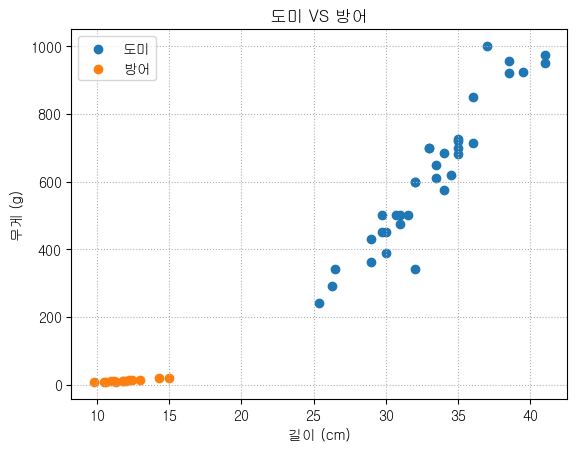

In [162]:
## scatter_plot
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 VS 방어")
plt.xlabel("길이 (cm)")
plt.ylabel("무게 (g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [163]:
## list
length = bream_length + smelt_length ## 더해지는 것이 아닌 리스트에 붙는다
weigth = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(weigth))

## x_2d
fish_data = np.column_stack([length, weigth])
print(fish_data)

print(type(fish_data))
print(np.shape(fish_data))

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
<class 'numpy.ndarray'>
(49, 2)


In [164]:
##
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [165]:
# knn calss
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression > 같은 방식 

In [166]:
knn = KNeighborsClassifier(n_neighbors=5,
                        weights="uniform",  
                        metric="minkowski",
                        p=2)

knn.fit(fish_data, fish_target)
print("Train Acc = ",knn.score(fish_data, fish_target))

Train Acc =  1.0


In [167]:
## Attribute
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)



classes =  [0. 1.]
metrics =  euclidean
samples =  49


In [168]:
##
np.column_stack([fish_data, fish_target])

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [169]:
idx = np.arange(49)
np.random.shuffle(idx)
print(idx)

[14 31 24 46 19 22  4  9 28 29 18 27 25 21  8  5 40 36 35 45  2 20 47 38
 33 15  1 30 48 10 11 13 37 41 17 16 32 42 23 43  7 34 39  3  0 12 44  6
 26]


In [170]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print(np.column_stack((train_X, train_y)))

# np.common_type(np.column_stack((train_X, train_y),np.column_stack(test_X,test_y)))

[[  32.   600.     1. ]
 [  38.5  955.     1. ]
 [  35.   700.     1. ]
 [  13.    12.2    0. ]
 [  33.5  650.     1. ]
 [  34.5  620.     1. ]
 [  29.   430.     1. ]
 [  30.7  500.     1. ]
 [  36.   850.     1. ]
 [  37.  1000.     1. ]
 [  33.5  610.     1. ]
 [  36.   714.     1. ]
 [  35.   725.     1. ]
 [  34.   685.     1. ]
 [  30.   450.     1. ]
 [  29.7  450.     1. ]
 [  11.3    8.7    0. ]
 [  10.5    7.5    0. ]
 [   9.8    6.7    0. ]
 [  12.4   13.4    0. ]
 [  26.5  340.     1. ]
 [  34.   575.     1. ]
 [  14.3   19.7    0. ]
 [  11.     9.7    0. ]
 [  41.   975.     1. ]
 [  32.   600.     1. ]
 [  26.3  290.     1. ]
 [  38.5  920.     1. ]
 [  15.    19.9    0. ]
 [  31.   475.     1. ]
 [  31.   500.     1. ]
 [  32.   340.     1. ]
 [  10.6    7.     0. ]
 [  11.8   10.     0. ]
 [  33.   700.     1. ]]
[[  32.   600.     1. ]
 [  38.5  955.     1. ]
 [  35.   700.     1. ]
 [  13.    12.2    0. ]
 [  33.5  650.     1. ]
 [  34.5  620.     1. ]
 [  29.   430. 

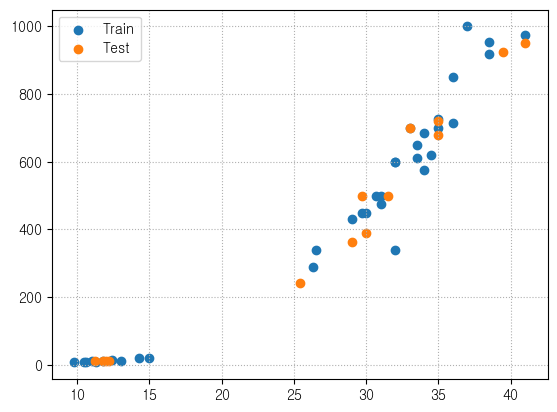

In [171]:
plt.scatter(train_X[:, 0], train_X[:, 1], label = "Train")
plt.scatter(test_X[:, 0], test_X[:, 1], label = "Test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()


In [172]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights="uniform",
    metric="minkowski",
    p=2
)


In [69]:
knn.fit(train_X, train_y)
print("Test Acc =", knn.score(test_X, test_y))

print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples", knn.n_samples_fit_)

Test Acc = 1.0
classes =  [0. 1.]
metrics =  euclidean
samples 35


In [70]:
from sklearn.model_selection import train_test_split

In [74]:
train_X, test_X, train_y,test_y = train_test_split(
    fish_data, fish_target, stratify= fish_target, random_state=1234
)

print(train_X)

[[  12.4   13.4]
 [  32.   600. ]
 [  14.3   19.7]
 [  26.3  290. ]
 [  30.   390. ]
 [  37.  1000. ]
 [  33.   700. ]
 [  31.   475. ]
 [  31.5  500. ]
 [  13.    12.2]
 [  15.    19.9]
 [  11.8    9.9]
 [  41.   950. ]
 [  34.   685. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  30.   450. ]
 [  32.   340. ]
 [  33.5  650. ]
 [  12.2   12.2]
 [  26.5  340. ]
 [  10.5    7.5]
 [  12.     9.8]
 [  29.   430. ]
 [  39.5  925. ]
 [  35.   725. ]
 [  38.5  920. ]
 [  36.   714. ]
 [  29.   363. ]
 [  34.   575. ]
 [  31.   500. ]
 [  10.6    7. ]
 [  41.   975. ]
 [  29.7  500. ]
 [  35.   700. ]
 [  35.   680. ]]


In [76]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

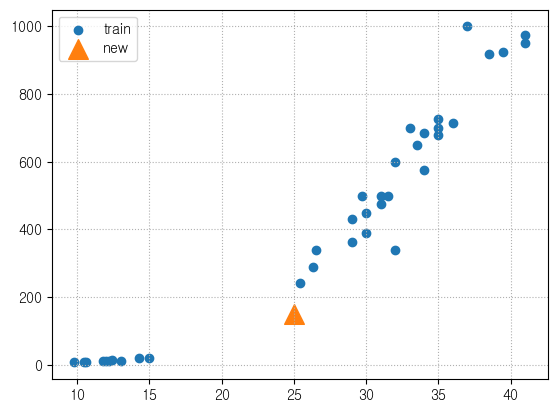

In [77]:
##
plt.scatter(train_X[:,0], train_X[:,1], label = "train")
plt.scatter(25, 150, marker="^" ,s = 200, label = "new")
plt.legend()
plt.grid(linestyle = ":")
plt.show()


In [78]:
knn.predict([[25, 150]])

array([0.])

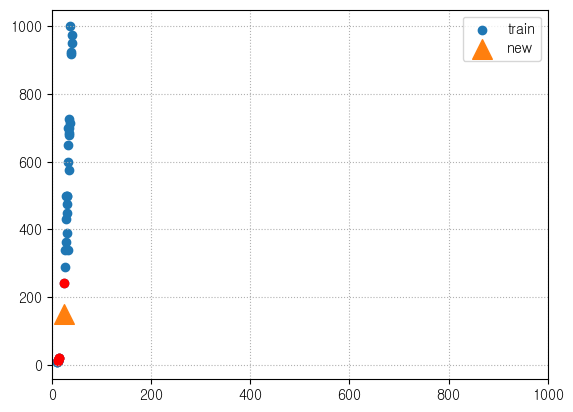

In [82]:
distance, index = knn.kneighbors([[25, 150]])

# 데이터 시각화
plt.scatter(train_X[:, 0], train_X[:, 1], label="train")
plt.scatter(25, 150, marker="^", s=200, label="new")
plt.scatter(train_X[index, 0], train_X[index, 1], c="r")
plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle=":")
plt.show()


In [87]:
## 표준화
mean = np.mean(train_X, axis= 0)
std = np.std(train_X, axis = 0)

train_scaled =(train_X - np.mean(train_X, axis = 0)) /np.std(test_X, axis= 0)
train_scaled


array([[-1.40158506, -1.28986299],
       [ 0.4605095 ,  0.4957148 ],
       [-1.2210759 , -1.27068614],
       [-0.081018  , -0.44790796],
       [ 0.27049985, -0.14351352],
       [ 0.93553362,  1.71329256],
       [ 0.55551432,  0.80010924],
       [ 0.36550467,  0.11522175],
       [ 0.41300708,  0.19132036],
       [-1.34458217, -1.29351572],
       [-1.15457252, -1.27007735],
       [-1.45858796, -1.30051679],
       [ 1.31555292,  1.56109534],
       [ 0.65051915,  0.75445008],
       [-0.16652235, -0.5940173 ],
       [-1.64859761, -1.31025741],
       [ 0.27049985,  0.03912314],
       [ 0.4605095 , -0.29571074],
       [ 0.60301673,  0.64791202],
       [-1.42058603, -1.29351572],
       [-0.06201704, -0.29571074],
       [-1.58209423, -1.30782226],
       [-1.43958699, -1.30082119],
       [ 0.17549502, -0.02175575],
       [ 1.17304568,  1.48499673],
       [ 0.74552397,  0.87620785],
       [ 1.07804085,  1.46977701],
       [ 0.84052879,  0.84272446],
       [ 0.17549502,

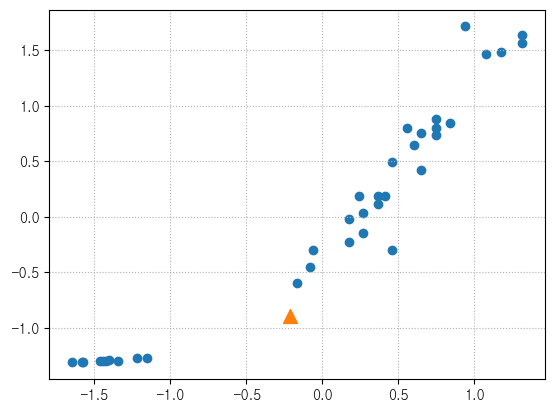

In [88]:
new = ([25, 150] - mean) / std

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker="^", s= 100)
plt.grid(linestyle = ":")
plt.show()

In [89]:
test_scaled = (test_X - mean) / std

knn.fit(train_scaled, train_y)
print("Test ACC = ", knn.score(test_scaled, test_y))
print("Prediction =",knn.predict([new]))


Test ACC =  1.0
Prediction = [1.]


In [91]:
distance, index = knn.kneighbors([new])

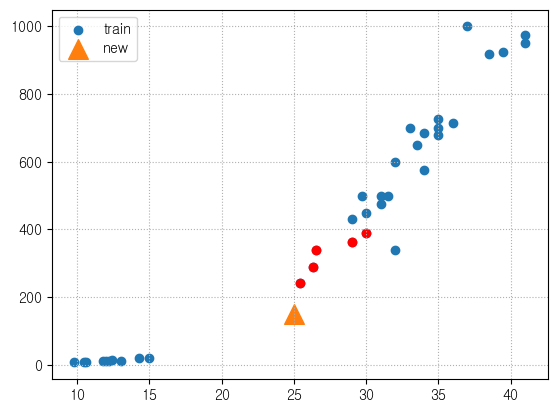

In [93]:
plt.scatter(train_X[:, 0], train_X[:, 1], label="train")
plt.scatter(25, 150, marker="^", s=200, label="new")
plt.scatter(train_X[index, 0], train_X[index, 1], c="r")
# plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle=":")
plt.show()

In [94]:
## GridSearch
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3,30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

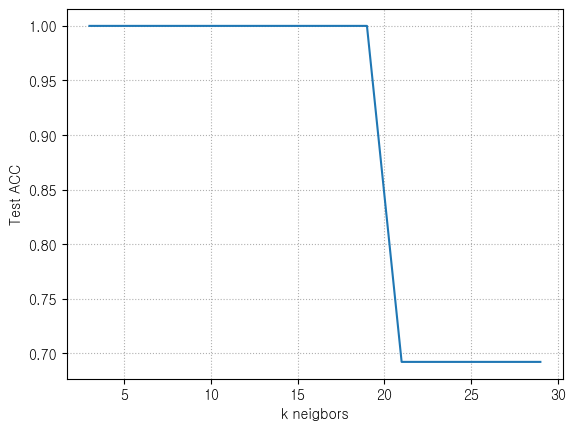

In [95]:
plt.plot(n_list,score_list)
plt.xlabel("k neigbors")
plt.ylabel("Test ACC")
plt.grid(linestyle =":")
plt.show()

## KNN을 이용해서 Seaborn iris 자료 분류

In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [175]:
iris = sns.load_dataset('iris')
print(iris.head())
iris.shape

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


(150, 5)

In [176]:
## Summary statitic
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


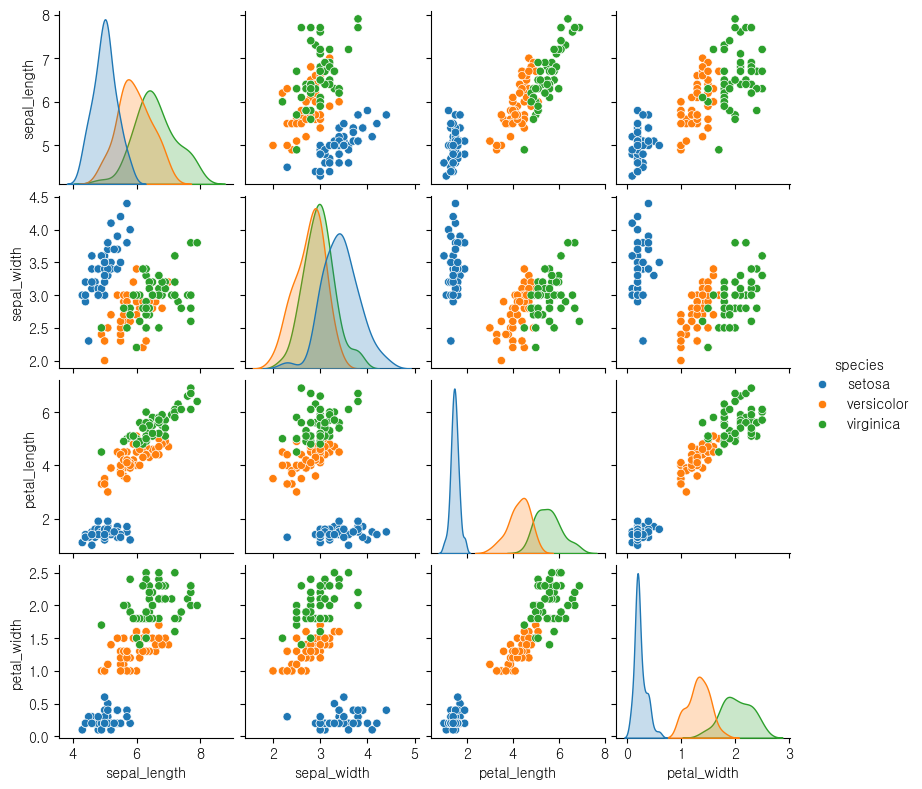

In [177]:
## visulization
sns.pairplot(iris, hue = "species", height= 2)
plt.show()

In [178]:
x = iris.loc[:, :"petal_width"]
y = iris["species"]

train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2, stratify=y)

print("train_x shape =", train_X.shape)
print("test_x shape =", test_X.shape)


train_x shape = (120, 4)
test_x shape = (30, 4)


In [183]:
## Scailing
mean = train_X.mean()
std = train_X.std()

train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/std

print(train_scaled)

     sepal_length  sepal_width  petal_length  petal_width
113     -0.162821    -1.240005      0.729061     1.095136
76       1.206118    -0.558476      0.613946     0.299477
70       0.086077     0.350230      0.613946     0.829916
45      -1.282862    -0.104123     -1.343006    -1.159231
19      -0.909515     1.713290     -1.285449    -1.159231
..            ...          ...           ...          ...
74       0.708322    -0.331299      0.326159     0.166867
129      1.703914    -0.104123      1.189520     0.564697
145      1.081669    -0.104123      0.844175     1.492965
63       0.334975    -0.331299      0.556388     0.299477
83       0.210526    -0.785652      0.786618     0.564697

[120 rows x 4 columns]


In [180]:
# KNeighborsClassifier
knn = KNeighborsClassifier()  # k = 5

knn.fit(train_scaled, train_y)
print("train ACC = ", knn.score(train_scaled, train_y))
print("test ACC = ", knn.score(test_scaled, test_y))

train ACC =  0.9416666666666667
test ACC =  1.0


In [181]:
print("classes = ", knn.classes_)
print("feature names = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
feature names =  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
metric =  euclidean
samples =  120
k =  5


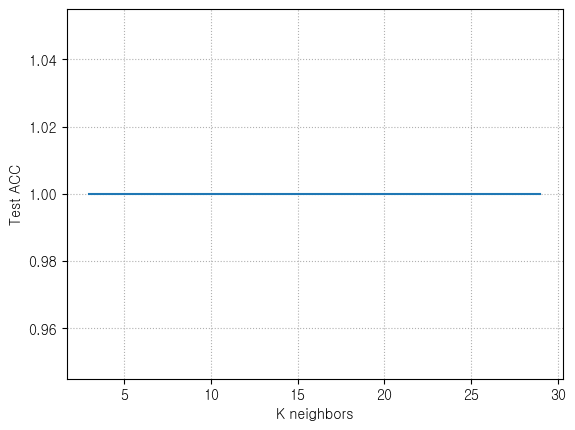

In [182]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3,30):
    if n % 2 != 0:
        knn.n_neigbors = n
        knn.fit(train_scaled, train_y)
        score= knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list)
plt.grid(linestyle = ":")
plt.xlabel("K neighbors")
plt.ylabel("Test ACC")
plt.show()     

In [5]:
## 
wine = pd.read_csv("https://bit.ly/wine-date")
print(wine.head())
print(wine["class"].value_counts)

wine["class"] = wine["class"].astype("int32")
print(wine["class"].value_counts)


NameError: name 'pd' is not defined

In [189]:
## Summary statistics
wine_group = wine.groupby("class", observed= True)

wine_group.describe()

for idx, data in wine_group:
    print("class = ", idx)
    print(data.describe())
    print("=" * 50)

class =  0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
class =  1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.200000    65.800000     3.820000     1.0


In [ ]:
## visualization
sns.countplot(wine, x = "class")
plt.show()